## Homework 2: SGD(minibatch) Method for Wine Quality Prediction 

Add your code to the following sections:

    ## add your code here
    #--------------------------------

    #---------------------------------
    
Description: In this homework, we will practice cross-validation and implement the stochastic gradient optimization (mini-batch) to solve the wine quality prediction problem. Using the following code as your template. Specific requirements:

1. Use all function definitions given in the code (e.g., def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change the function names and input arguments.

2. Evaluate (Cross-validation) the model trained using GD (20 points)

3. SGD implementation. 40 pts
   
4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)
5. Plot the loss curve of the SGD. (5 points)
6. Plot the mse curves on the training and test sets using different models (w_hist). (20 points)

### Common mistakes
    
1. Call GD and SGD using the whole dataset

    -- GD and SGD are used to train the model (learn w); and we should call them using the training sets
   
2. Calculate gradient using the whole training set for SGD
    
    -- In SGD, update gradient only using mini-batches
  
3. Calculate the loss of each epoch using the average of all minibatches
    
    -- should use the w of the last mini-batch and the whole training set to calculate the loss  
   
4. Mix concepts of loss function and evaulation metrics
    -- loss function: for optimization purpose (gradient). We use the sum of square errors in this homework. L = 1/2 * sum(y_hat_i - y_i)^2
    
    -- evaluation metrics: mse and mae: mse = 1/m * sum(y_hat_i - y_i)^2, mae = 1/m * sum(abs(y_hat_i - y_i))

### 1. Load data, implement the model, loss function and GD 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## (1) Data preparation
df=pd.read_csv('winequality-white.csv', sep = ';')
df
X = df.values[:, :11] #input feature vectors
Y = df.values[:, 11] # target values
print('Data shape:', 'X:', X.shape, 'Y:', Y.shape)

# data normalization. Please use X1 rather than X in the rest of this homework
min_vals = np.min(X, axis = 0)
max_vals = np.max(X, axis = 0)
X1 = (X-min_vals)/(max_vals-min_vals)

##(2) Assume a linear mode that y = w0*1 + w_1*x_1 +w_2*x_2+...+ w_11*x_11
def predict(X, w):
    '''
    X: input feature vectors:n_samples * n_features
    w: weights
    
    return Y_hat
    '''
    # 
    Y_hat = np.zeros((X.shape[0]))
    for idx, x in enumerate(X):          
        y_hat = w[0] + np.dot(w[1:].T, np.c_[x]) # linear model
        Y_hat[idx] = y_hat    
    return Y_hat

## (3) Loss function: L = 1/2 * sum(y_hat_i - y_i)^2
def loss(w, X, Y):
    '''
    w: weights
    X: input feature vectors
    Y: targets
    '''
    Y_hat = predict(X, w)
    loss = 1/2* np.sum(np.square(Y - Y_hat))
    
    return loss

# Optimization Algo 1: Gradient Descent
def GD(X, Y, lr = 0.001, delta = 0.01, max_iter = 100):
    '''
    X: training data
    Y: training target
    lr: learning rate
    max_iter: the max iterations
    '''
    
    m = len(Y)
    b = np.reshape(Y, [Y.shape[0],1])
    w = np.random.rand(X.shape[1] + 1, 1) #w^0
    A = np.c_[np.ones((m, 1)), X]
    gradient = A.T.dot(np.dot(A, w)-b)
    
    loss_hist = np.zeros(max_iter) # history of loss
    w_hist = np.zeros((max_iter, w.shape[0])) # history of weight
    loss_w = 0
    i = 0                  
    while(np.linalg.norm(gradient) > delta) and (i < max_iter):
        w_hist[i,:] = w.T
        loss_w = loss(w, X, Y)
        print(i, 'loss:', loss_w)
        loss_hist[i] = loss_w
        
        w = w - lr*gradient        
        gradient = A.T.dot(np.dot(A, w)-b) # update the gradient using new w
        i = i + 1
        
    w_star = w  
    return w_star, loss_hist, w_hist

Data shape: X: (4898, 11) Y: (4898,)


### 2. Model evaluation using cross-validation (25 points)

#### 2.1 Split the dataset (X1, Y) into a training (70%) set, (X_train, y_train), and a test (30%) set, (X_test, y_test). (5 points)

In [2]:
from sklearn.model_selection import train_test_split

## add your code here
#-----------------------
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
#---------------------------------

(3428, 11) (1470, 11)


#### 2.2 Model training using the GD function with different learning rate (10 points )

In [3]:
## add your code here
#-----------------------
lr = 0.0001

w_star, loss_hist, w_hist = GD(X_train, y_train, lr=lr, delta=0.01, max_iter=100)
#---------------------------------

0 loss: 40050.885606190524
1 loss: 7540.272575463837


C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


2 loss: 2389.3401297293376
3 loss: 1568.8326015322214
4 loss: 1433.845607177889
5 loss: 1407.4866647833037
6 loss: 1398.445651423013
7 loss: 1392.2669481818323
8 loss: 1386.6590140784197
9 loss: 1381.2556602078537
10 loss: 1375.995536439962
11 loss: 1370.8656451788
12 loss: 1365.8607433441048
13 loss: 1360.9769136463808
14 loss: 1356.2105440242412
15 loss: 1351.558163141713
16 loss: 1347.016411469419
17 loss: 1342.5820339150916
18 loss: 1338.2518759520603
19 loss: 1334.0228803859434
20 loss: 1329.8920843042747
21 loss: 1325.8566161344488
22 loss: 1321.913692795687
23 loss: 1318.060616940362
24 loss: 1314.2947742816082
25 loss: 1310.6136310044772
26 loss: 1307.0147312580195
27 loss: 1303.495694725756
28 loss: 1300.0542142720906
29 loss: 1296.6880536622857
30 loss: 1293.3950453537007
31 loss: 1290.1730883560635
32 loss: 1287.0201461586169
33 loss: 1283.9342447220452
34 loss: 1280.9134705331594
35 loss: 1277.955968720371
36 loss: 1275.0599412280594
37 loss: 1272.2236450479877
38 loss: 126

In [4]:
## add your code here
#-----------------------
lr = 0.00001

w_star, loss_hist, w_hist = GD(X_train, y_train, lr=lr, delta=0.01, max_iter=100)
#---------------------------------

0 loss: 34991.52909728221


C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


1 loss: 31062.113920858646
2 loss: 27591.63113240123
3 loss: 24526.47433254288
4 loss: 21819.298723886714
5 loss: 19428.28971211241
6 loss: 17316.516939587695
7 loss: 15451.363772370909
8 loss: 13804.023427121072
9 loss: 12349.05395390813
10 loss: 11063.985200142804
11 loss: 9928.971683867749
12 loss: 8926.486013875578
13 loss: 8041.048120500888
14 loss: 7258.986114149137
15 loss: 6568.225077221545
16 loss: 5958.100526620037
17 loss: 5419.193665136003
18 loss: 4943.18587662883
19 loss: 4522.730217185044
20 loss: 4151.337917008654
21 loss: 3823.2781396843566
22 loss: 3533.489450259709
23 loss: 3277.5016244743842
24 loss: 3051.3665912181914
25 loss: 2851.5974413928843
26 loss: 2675.1145609653886
27 loss: 2519.1980560570764
28 loss: 2381.4457351152887
29 loss: 2259.735999061015
30 loss: 2152.1950661268334
31 loss: 2057.1680250629415
32 loss: 1973.1932695311416
33 loss: 1898.9799187403696
34 loss: 1833.3878755098806
35 loss: 1775.4102136900938
36 loss: 1724.1576228558413
37 loss: 1678.8446

##### What do you observed from the results of two learning rates?
Add your response here:

The first learning rate started and ended with lower loss than the second one. The second one dropped lower faster, but leveled out sooner.





#### 2.3. Evaluate the trained model (w_star) using the MSE and MAE on the training set and test set, respectively. (10 points)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#training error: MSE, MAE
## add your code here
#-----------------------
def evaluate_model(w_star, X, Y):
    y_pred = predict(X, w_star) 

    mse = mean_squared_error(Y, y_pred)
    mae = mean_absolute_error(Y, y_pred)
    
    return mse, mae

mse_train, mae_train = evaluate_model(w_star, X_train, y_train)

print('training mse: {} and training mae:{}'.format(mse_train, mae_train))
#---------------------------------


## test error: MAE, MSE
## add your code here
#-----------------------
mse_test, mae_test = evaluate_model(w_star, X_test, y_test)


print('test mse: {} and test mae:{}'.format(mse_test, mae_test))
#---------------------------------

training mse: 0.7674260928972677 and training mae:0.6843228272657004
test mse: 0.7607787261902167 and test mae:0.6786902829871146


C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat
C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


### 3. SGD implementation (35 points)
Use the SGD function definition given in the code (def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100):); and do not change it.

In [12]:
import random
def SGD(X, Y, lr = 0.001, batch_size = 32, epoch = 100): 
    '''Implement the minibatch Gradient Desent approach
    
        X: training data
        Y: training target
        lr: learning rate
        batch_size: batch size
        epoch: number of max epoches
        
        return: w_star, w_hist, loss_hist
    '''
    m = len(Y)
    np.random.seed(9)
    w = np.random.rand(X.shape[1]+1, 1)    #(12,1) values in [0, 1)
    w_hist = np.zeros((epoch, w.shape[0])) # (epoch,12) 
    loss_hist = np.zeros(epoch)            # (epoch,)
   
    
    ## add your code here
    #-----------------------
    A = np.c_[np.ones((m, 1)), X]
    b = np.reshape(Y, [Y.shape[0],1])
    X_shuffled = np.copy(X)
    Y_shuffled = np.copy(Y)
    
    for i in range(epoch):
        #(1) Shuffle data (X and Y) at the beginning of each epoch. (5 points)
        random.shuffle(X_shuffled)
        random.shuffle(Y_shuffled)
        
        #(2) go through all minibatches and update w. (25 points)
        for b in range(int(m/batch_size)): 
            #prepare the bth minibatch X_batch and Y_batch. 
            X_batch = X_shuffled[b * batch_size:(b + 1) * batch_size]
            Y_batch = Y_shuffled[b * batch_size:(b + 1) * batch_size].reshape(-1, 1)

            #print("Shape of X_batch:", X_batch.shape)
            #prepare A and b for current minibatch. 
            Y_pred = predict(X_batch, w)
            
            #gradient calcualation and w update. 
            error = Y_pred - Y_batch
            gradient = A.T.dot(np.dot(A, w)-b)
            #gradient = (1 / batch_size) * np.dot(X_batch.T, error)

            w -= lr * gradient            
            
        ## (3) Save the loss(on whole training set) and the weight for current epoch. 5 points
        Y_pred_all = predict(X, w) 
        loss_w = loss(w, X, Y)
        loss_hist[i] = loss_w
        w_hist[i] = w.flatten()
        
        print(i, loss_hist[i])
        
        ##(4) Decay learning rate at the end of each epoch. 
        lr = lr * 0.9
    #---------------------------------
    
    w_star = w
    return w_star, w_hist, loss_hist  

### 4. Calculate and print out the MSE and MAE values of SGD for the training and test sets (15 points)

In [14]:
batch_size = 32
n_epochs = 50

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

w = np.zeros((X_train.shape[1], 1))
#train model using SGD
w_star_SGD, w_hist_SGD, loss_hist_SGD = SGD(X_train, y_train, lr = 0.0001, batch_size = batch_size, epoch = n_epochs)

## add your code here
#-----------------------
#(1) print out the predicted wine quality values and the true quality 
# values of the first 10 data samples in the test dataset.  5 points
y_pred_test = predict(X_test, w_star_SGD).flatten()
print("True values (first 10):", y_test[:10])
print("Predicted values (first 10):", y_pred_test[:10])

#(2) model's MSE and MAE on the training set using w_star_SGD. 5 points
y_pred_train = predict(X_train, w_star_SGD).flatten()
mse_train = np.mean((y_train - y_pred_train) ** 2)
mae_train = np.mean(np.abs(y_train - y_pred_train))
print("Training Set MSE:", mse_train)
print("Training Set MAE:", mae_train)

#(3) model's MSE and MAE on the test set. 5 points
mse_test = np.mean((y_test - y_pred_test) ** 2)
mae_test = np.mean(np.abs(y_test - y_pred_test))
print("Test Set MSE:", mse_test)
print("Test Set MAE:", mae_test)

#---------------------------------

Shape of X_train: (3428, 11)
Shape of y_train: (3428,)


C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


0 16898834.92515845
1 16839771.91383601
2 16772126.610578831
3 16696207.562616337
4 16611571.071184073
5 16517490.741415696
6 16413080.699324751
7 16297328.960014641
8 16169106.188066382
9 16027166.03059158
10 15870142.109283809
11 15696543.762021055
12 15504751.69994234
13 15293014.646965854
14 15059448.934817921
15 14802046.236547083
16 14518702.20344485
17 14207291.338333122
18 13865826.00587039
19 13492737.36359017
20 13087288.546877164
21 12650072.571235895
22 12183478.783144072
23 11691970.468920562
24 11182036.943734668
25 10661770.711739924
26 10140139.581919905
27 9626119.420842022
28 9127883.01298698
29 8652199.113380473
30 8204112.951662318
31 7786896.420610957
32 7402201.812074053
33 7050334.5492602475
34 6730569.123511445
35 6441454.261026405
36 6181076.680560543
37 5947271.415325789
38 5737778.809864001
39 5550354.753585664
40 5382843.153245601
41 5233219.700472426
42 5099614.869171519
43 4980322.548408252
44 4873799.199153137
45 4778657.108909221
46 4693654.264853023
47 

### 5. Plot the loss curve of SGD returned from the training. (5 points)
Plot the values in loss_hist_SGD. The horizontal axis is epoch.

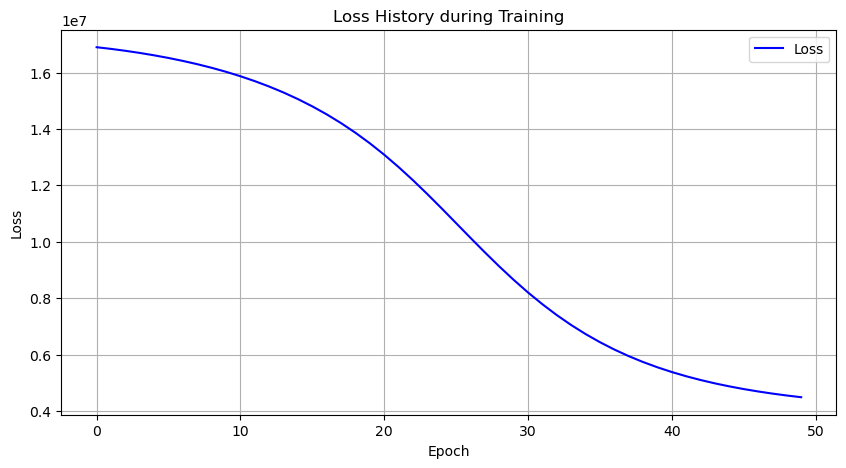

In [16]:
## add your code here
#-----------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(n_epochs), loss_hist_SGD, label='Loss', color='blue')
plt.title('Loss History during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

#---------------------------------

### 6. Plot the MSE curves on the training and test sets using different models (w_hist). (20 points)
- each row in w_hist_SGD defines one linear model
- apply each linear model to predict results for the training and test sets
- calculate mse for both training and test sets.

~~~python

#sample code
    for i in range(n_epochs):
        #y_train_SGD_pred = # call predict using X_train and w_hist_SGD[i]
        #y_test_SGD_pred = # call predict using X_test and w_hist_SGD[i]

        #mse_SGD_train[i] = 
        #mse_SGD_test[i] = 

    #plot the mse curve on the training set
    #plot the mse curve on the test set
~~~

C:\Users\kingj\AppData\Local\Temp\ipykernel_22684\1105346865.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_hat[idx] = y_hat


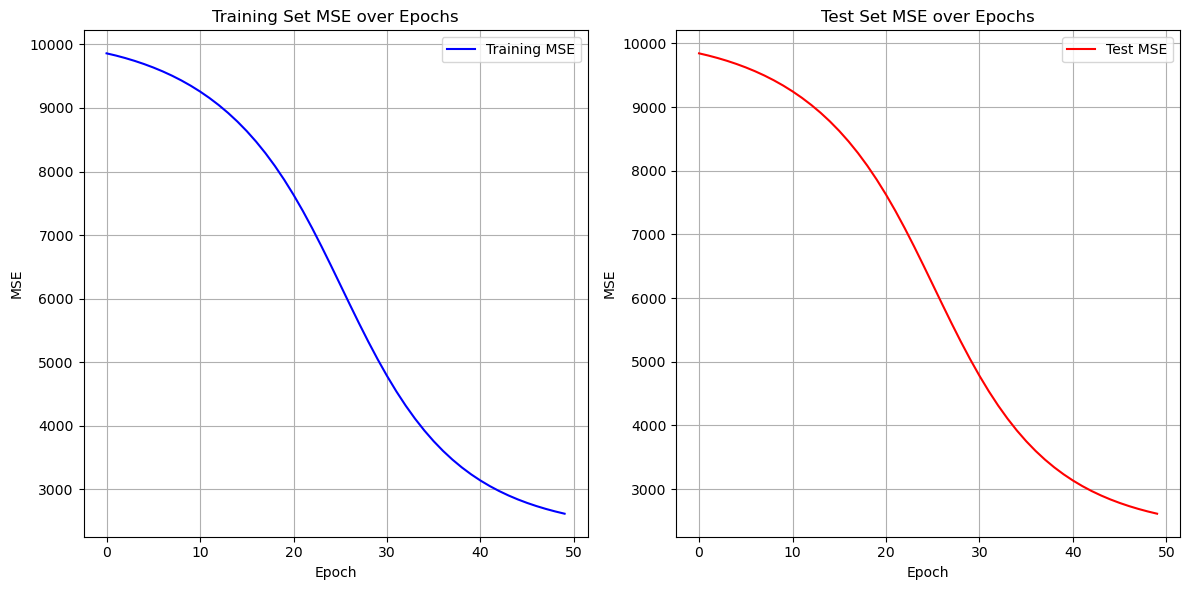

In [18]:
mse_SGD_train=np.zeros(n_epochs)
mse_SGD_test=np.zeros(n_epochs)

## add your code here
#-----------------------
for i in range(n_epochs):
    y_train_SGD_pred = predict(X_train, w_hist_SGD[i]).flatten()
    y_test_SGD_pred = predict(X_test, w_hist_SGD[i]).flatten()
    mse_SGD_train[i] = np.mean((y_train - y_train_SGD_pred) ** 2)
    mse_SGD_test[i] = np.mean((y_test - y_test_SGD_pred) ** 2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(n_epochs), mse_SGD_train, label='Training MSE', color='blue')
plt.title('Training Set MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(n_epochs), mse_SGD_test, label='Test MSE', color='red')
plt.title('Test Set MSE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#---------------------------------